# 用 ARMA 进行时间序列预测

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
import statsmodels.api as sm

# 每年的最后一天
data_index = sm.tsa.datetools.dates_from_range('1901', '1990')
len(data_index)

90

In [7]:
data_index[:10]

[datetime.datetime(1901, 12, 31, 0, 0),
 datetime.datetime(1902, 12, 31, 0, 0),
 datetime.datetime(1903, 12, 31, 0, 0),
 datetime.datetime(1904, 12, 31, 0, 0),
 datetime.datetime(1905, 12, 31, 0, 0),
 datetime.datetime(1906, 12, 31, 0, 0),
 datetime.datetime(1907, 12, 31, 0, 0),
 datetime.datetime(1908, 12, 31, 0, 0),
 datetime.datetime(1909, 12, 31, 0, 0),
 datetime.datetime(1910, 12, 31, 0, 0)]

In [9]:
data = [
    5922, 5308, 5546, 5975, 2704, 1767, 4111, 5542, 4726, 5866, 6183, 3199,
    1471, 1325, 6618, 6644, 5337, 7064, 2912, 1456, 4705, 4579, 4990, 4331,
    4481, 1813, 1258, 4383, 5451, 5169, 5362, 6259, 3743, 2268, 5397, 5821,
    6115, 6631, 6474, 4134, 2728, 5753, 7130, 7860, 6991, 7499, 5301, 2808,
    6755, 6658, 7644, 6472, 8680, 6366, 5252, 8223, 8181, 10548, 11823, 14640,
    9873, 6613, 14415, 13204, 14982, 9690, 10693, 8276, 4519, 7865, 8137,
    10022, 7646, 8749, 5246, 4736, 9705, 7501, 9587, 10078, 9732, 6986, 4385,
    8451, 9815, 10894, 10287, 9666, 6072, 5418
]
len(data)

90

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


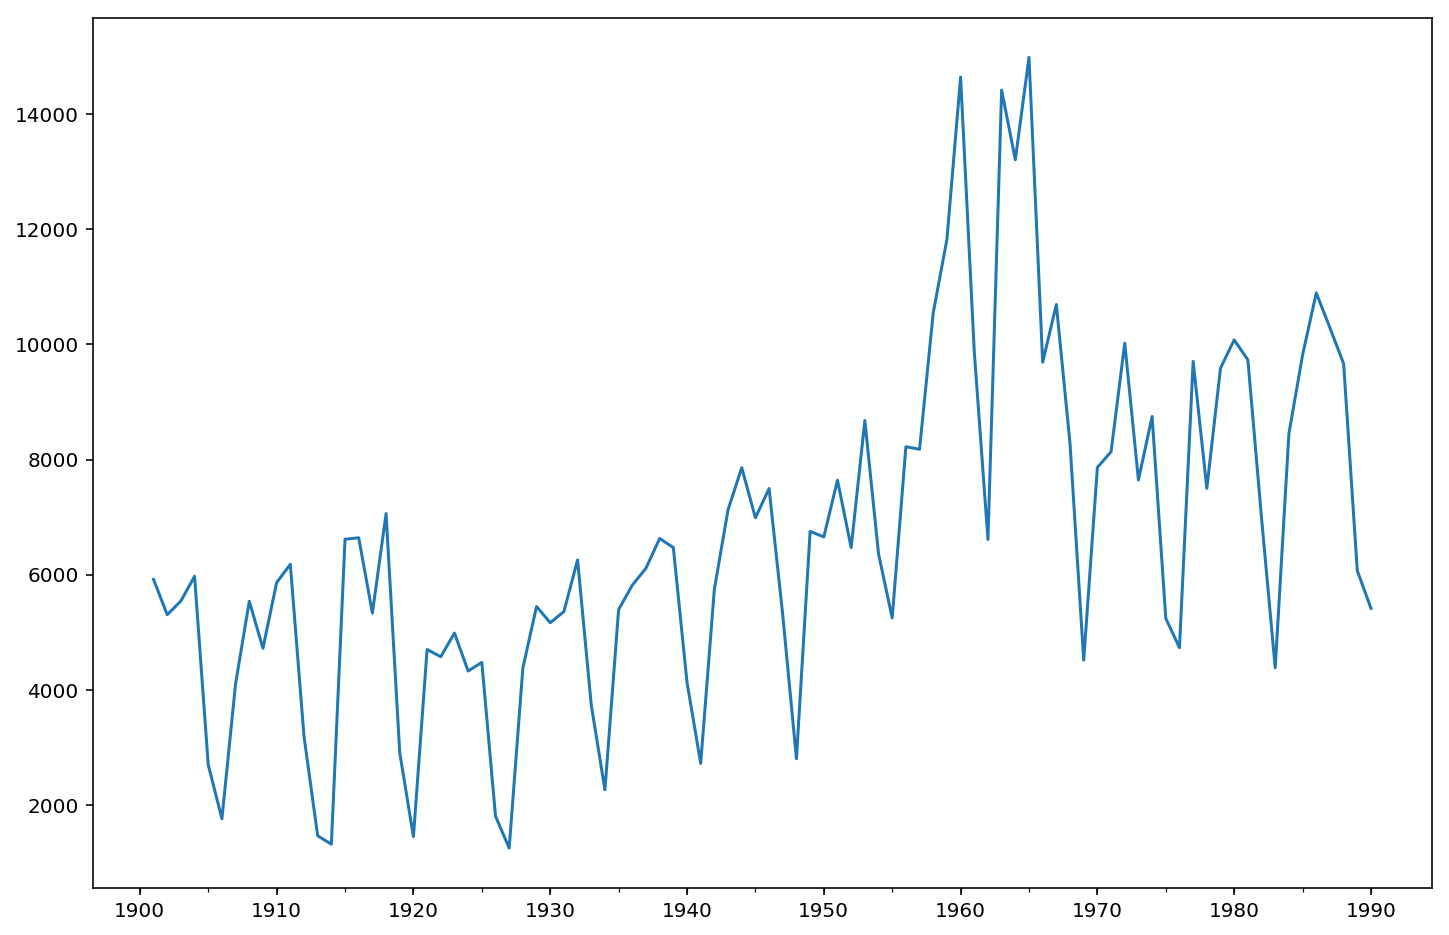

In [10]:
data = pd.Series(data)

# 绘制数据图
data.index = pd.Index(data_index)
data.plot(figsize=(12, 8))
plt.show()

In [12]:
from statsmodels.tsa.arima_model import ARMA

# 创建 ARMA 模型 # 创建 ARMA 模型
arma = ARMA(data, (7, 0)).fit()
print('AIC: %0.4lf' % arma.aic)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1026: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1029: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result

AIC: 1619.6323


In [16]:
arma.bic

1642.1305534389082

In [13]:
# 模型预测
# 预测后 11 年的走势
predict_y = arma.predict('1990', '2000')
predict_y

1990-12-31    5256.665633
1991-12-31    7205.619637
1992-12-31    8578.071131
1993-12-31    9629.012562
1994-12-31    9596.842652
1995-12-31    9191.654654
1996-12-31    7399.727796
1997-12-31    6337.605997
1998-12-31    6873.557668
1999-12-31    7793.834839
2000-12-31    8664.931082
Freq: A-DEC, dtype: float64

In [14]:
len(predict_y)

11

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


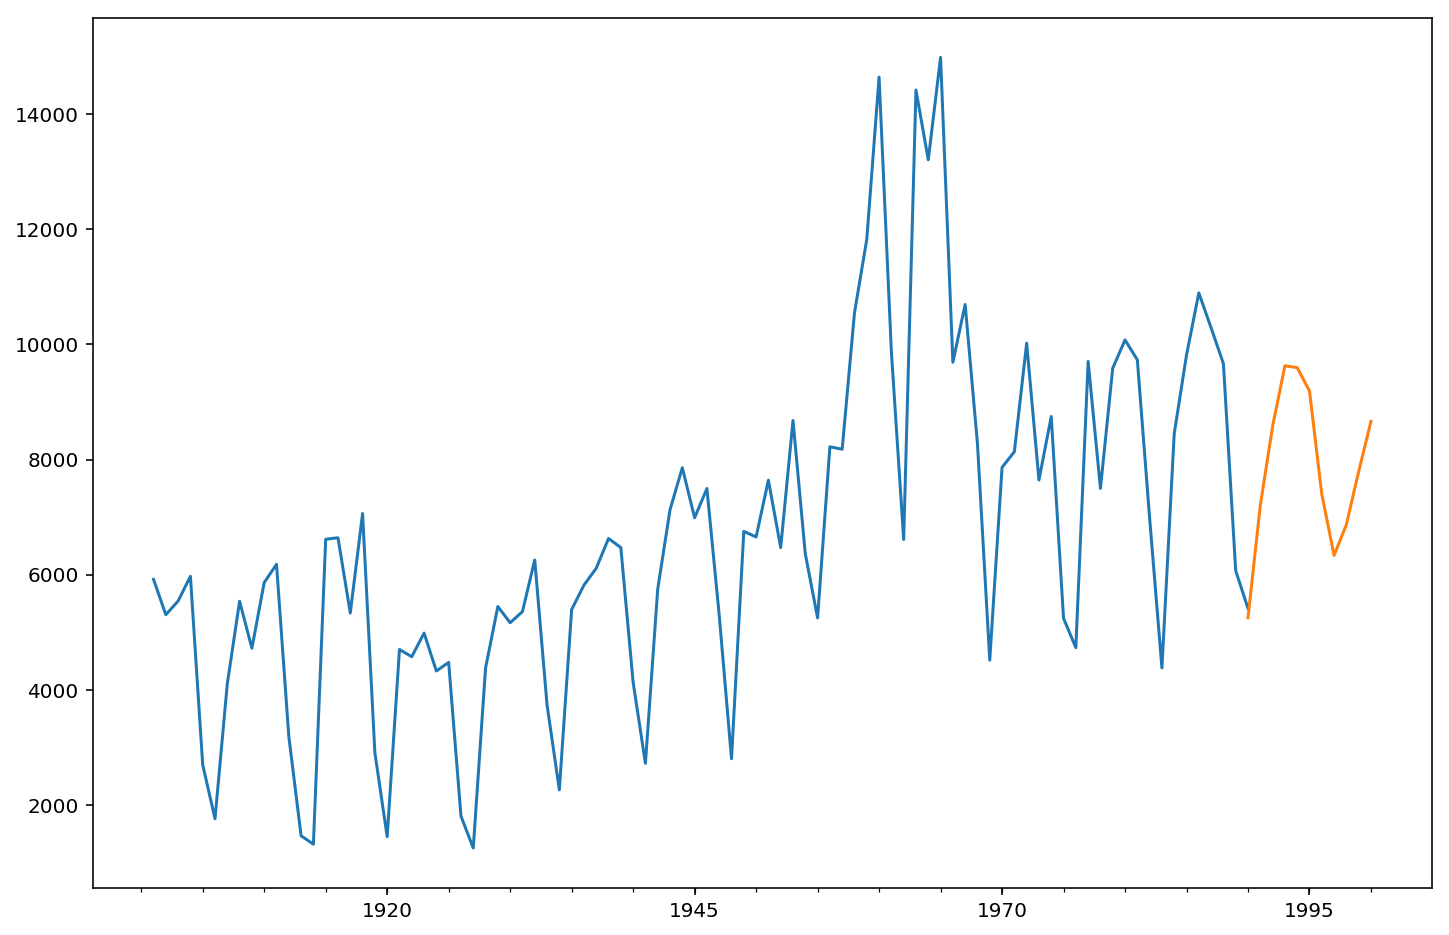

In [15]:
# 预测结果绘制
fig, ax = plt.subplots(figsize=(12, 8))
ax = data.ix['1901':].plot(ax=ax)
predict_y.plot(ax=ax)
plt.show()